# Objective of the analysis

1 Relation of customers with SuperMarket
    
2.Payment methods used in supermarket.

3.Products relation with quantities.

4.Types of product and their sales.

5.Products and their ratings

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('market.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.shape

(1000, 17)

data conatins 1000 rows and 17 columns

In [4]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

So our data is clean with no missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


Maximum  gross income is  49.65 while the minimum income is  0.5085

maximum unit price at the store is  99.96 while the minimum is 0.08

maximum ratings are  10 while the minimum rating at the store are  4

# Visualization
Now we use different visualization tools to check different aspects of Supermarket sales.

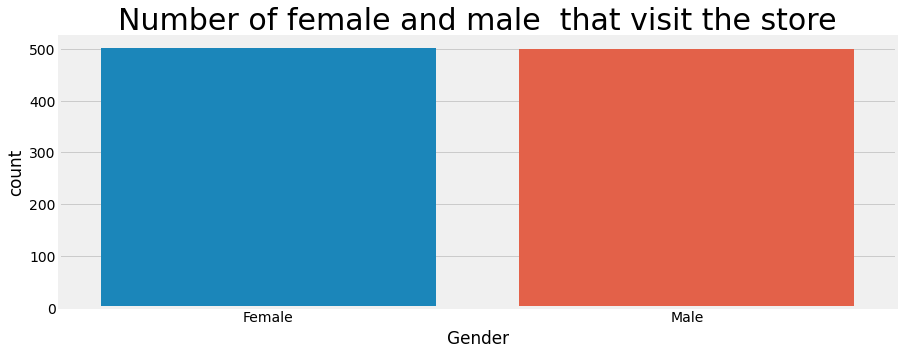

In [7]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
ax=sns.countplot('Gender',data=data)
plt.title('Number of female and male  that visit the store',fontsize=30)
plt.show()

THe figure above show that thenumber of female and males who visit the store are the same is is abit odd  thet

confirm with the numerical data

In [8]:
#checking the numerical data
data.groupby(['Gender']).agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


The number above of female and male s varys with a small margin

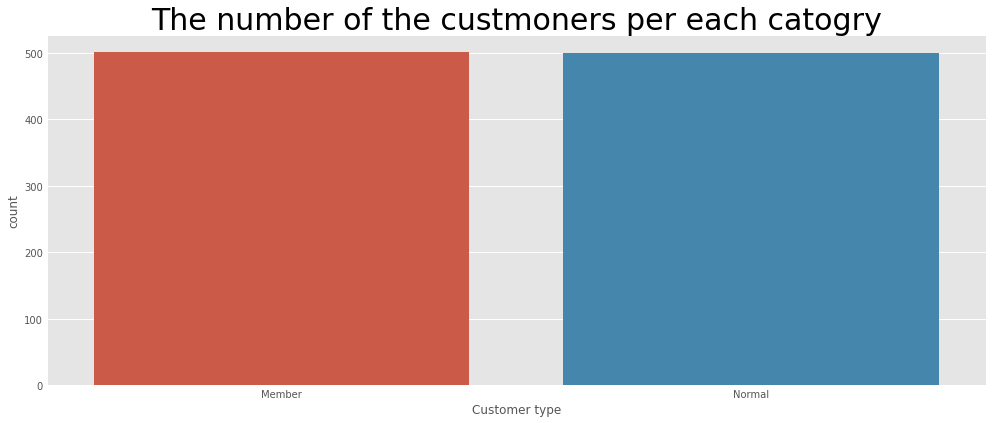

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(15,6))
sns.countplot('Customer type',data=data)
plt.title('The number of the custmoners per each catogry',fontsize=30)
plt.show()

THe number of  normal and memeber of the store seem the same which is odd

In [10]:
data.groupby(['Customer type']).agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


### investigating the customer type and the  and the branch

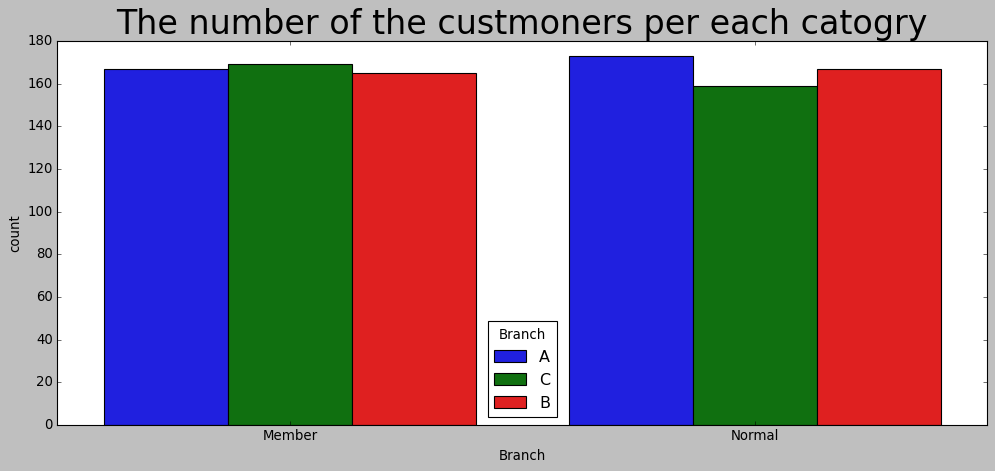

In [11]:
plt.style.use('classic')
plt.figure(figsize=(15,6))
sns.countplot('Customer type' ,hue='Branch',data=data)
plt.title('The number of the custmoners per each catogry',fontsize=30)
plt.xlabel('Branch')
plt.show()

# Investing diffrent method of payment methods used.

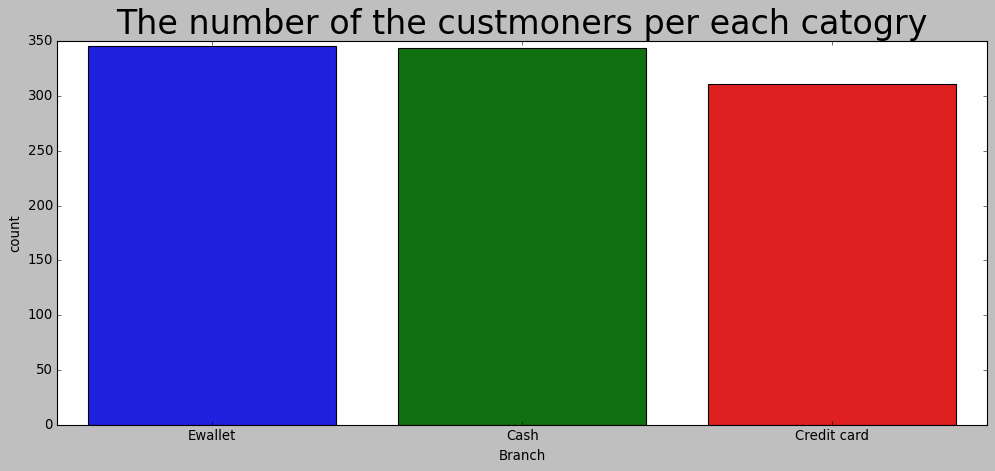

In [12]:
plt.figure(figsize=(15,6))
sns.countplot('Payment',data=data)
plt.title('The number of the custmoners per each catogry',fontsize=30)
plt.xlabel('Branch')
plt.show()

Most of the paymet are done through ewallent or cash but the least method of payment is  by a credit card

###  Payment methods distributed across the branches


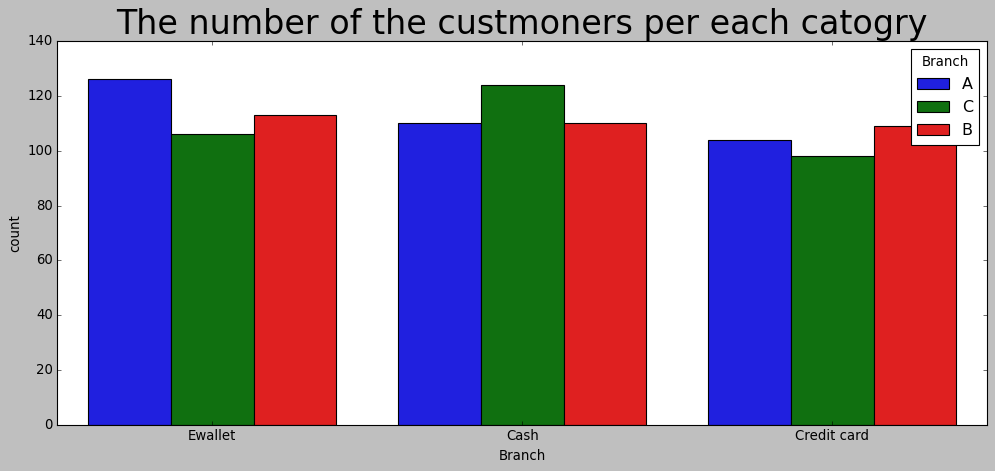

In [13]:
plt.figure(figsize=(15,6))
sns.countplot('Payment',hue='Branch',data=data)
plt.title('The number of the custmoners per each catogry',fontsize=30)
plt.xlabel('Branch')
plt.show()

Branch  A has the highest  ewallent tranfer

Brancg B had has the highest  credit  card transfer

branch C has the highesyt  cash tranfer 

which a good distribution

# rating distribution in 3 branches

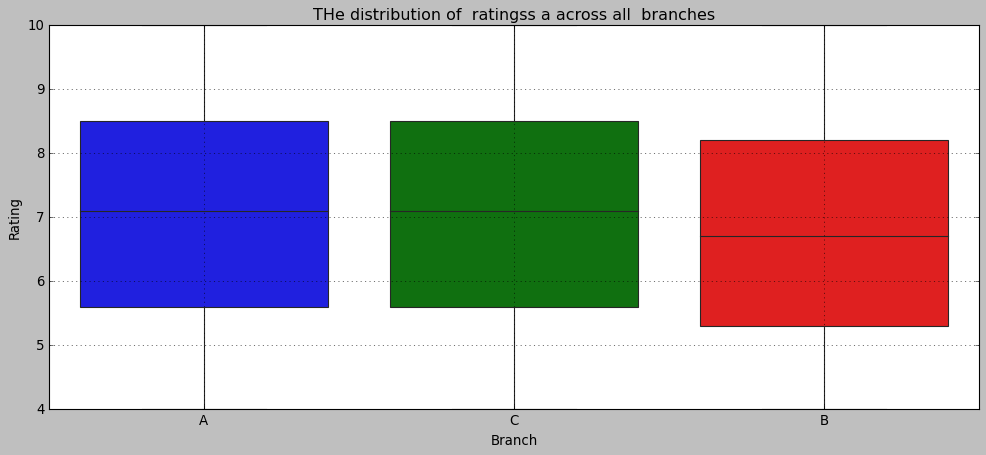

In [14]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Branch',y='Rating',data=data)
plt.title('THe distribution of  ratingss a across all  branches')
plt.grid()
plt.show()

Ratings of branch A and  C seem indentical  they mean is almost same 

## Checking  at what time the store makes the highest sales

In [15]:
data['Time']=pd.to_datetime(data['Time'])
data['Time'].head(2)

0   2021-07-16 13:08:00
1   2021-07-16 10:29:00
Name: Time, dtype: datetime64[ns]

In [16]:
#extracting hour from time
data['Hour']=data['Time'].dt.hour
data['Hour'].head()

0    13
1    10
2    13
3    20
4    10
Name: Hour, dtype: int64

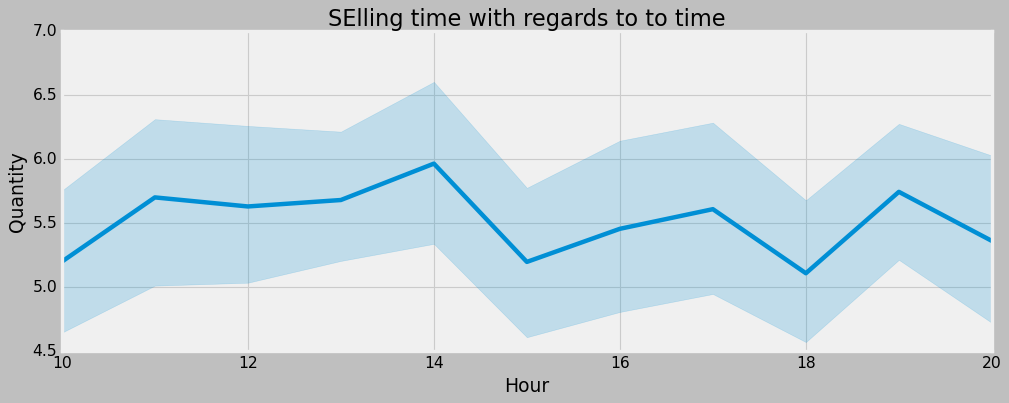

In [17]:
#plot of time with regards to the quantities
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
sns.lineplot('Hour','Quantity',data=data)
plt.title('SElling time with regards to to time')
plt.show()

Most of the sales were done  at 14.00

And the lowest sales were recorded at 18.000

In [18]:
data['Date']=pd.to_datetime(data['Date'])
data['Date'].head(2)

0   2019-01-05
1   2019-03-08
Name: Date, dtype: datetime64[ns]

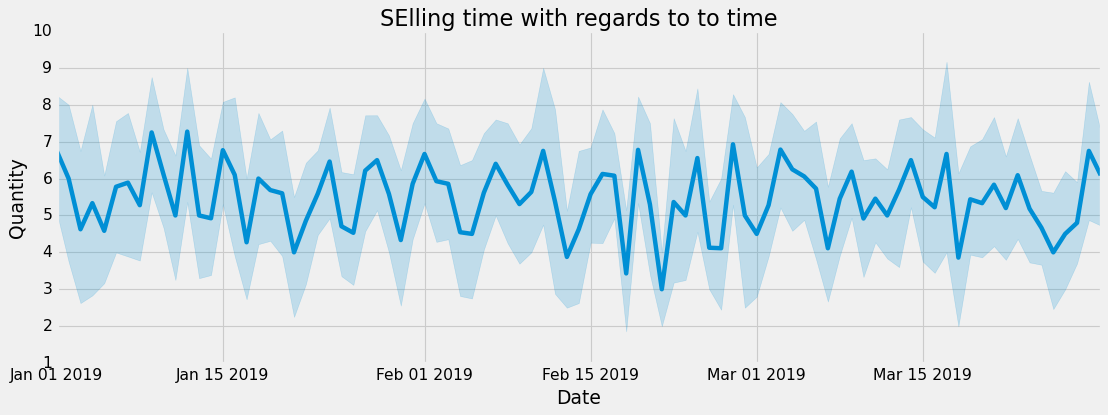

In [19]:
plt.figure(figsize=(15,5))
sns.lineplot('Date','Quantity',data=data)
plt.title('SElling time with regards to to time')
plt.show()

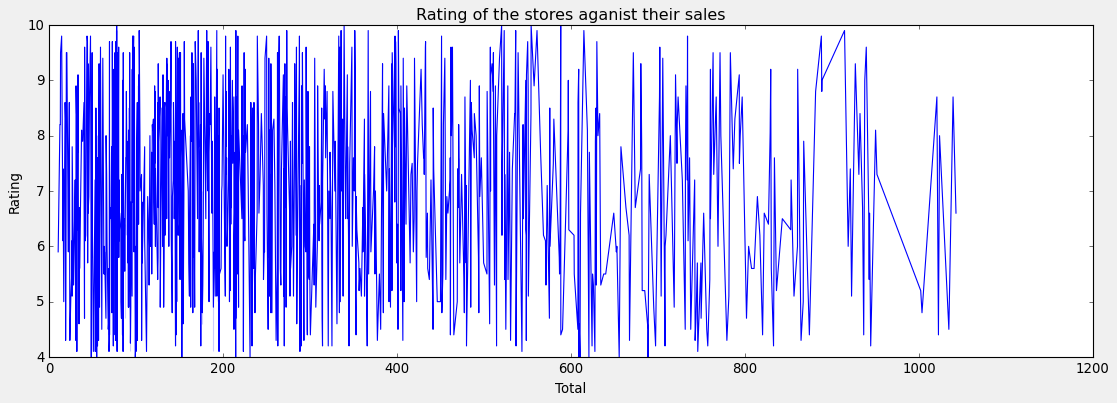

In [20]:
plt.figure(figsize=(15,5))
plt.style.use('classic')
sns.lineplot('Total','Rating',data=data)
plt.title('Rating of the stores aganist their sales')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

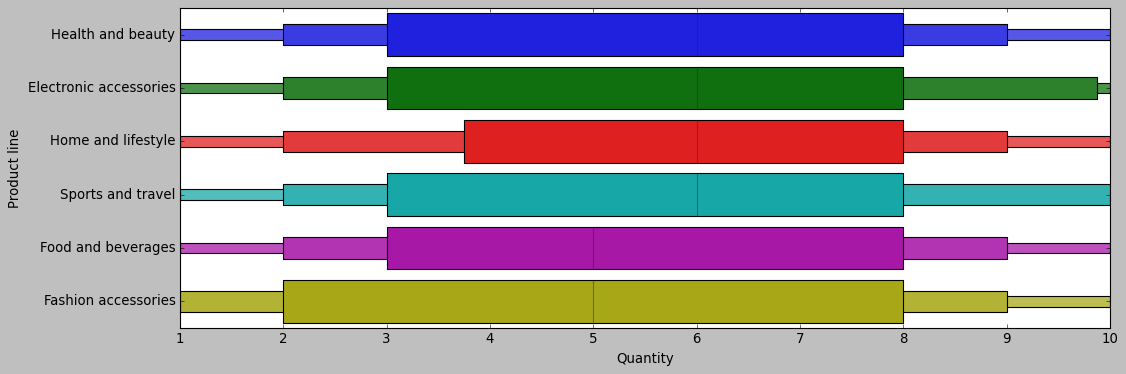

In [21]:
plt.figure(figsize=(15,5))
sns.boxenplot('Quantity','Product line' ,data=data)
plt.show()

 we can see that the average sales of different lines of products. Health and beauty making the highest sales 
 
 whereas Fashon accessories making the lowest sales.

## sales count of these products.

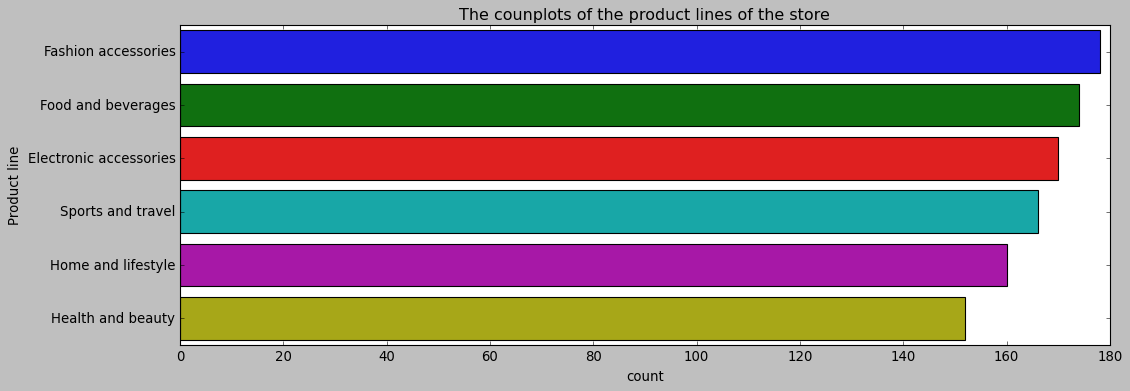

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(y='Product line',data=data,order=data['Product line'].value_counts().index)
plt.title('The counplots of the product lines of the store')
plt.show()

Fashion accessories had the highest sales  followed by food and beverage  and the least

on the store is healty and beauty store

## Total sales of product using boxenplot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

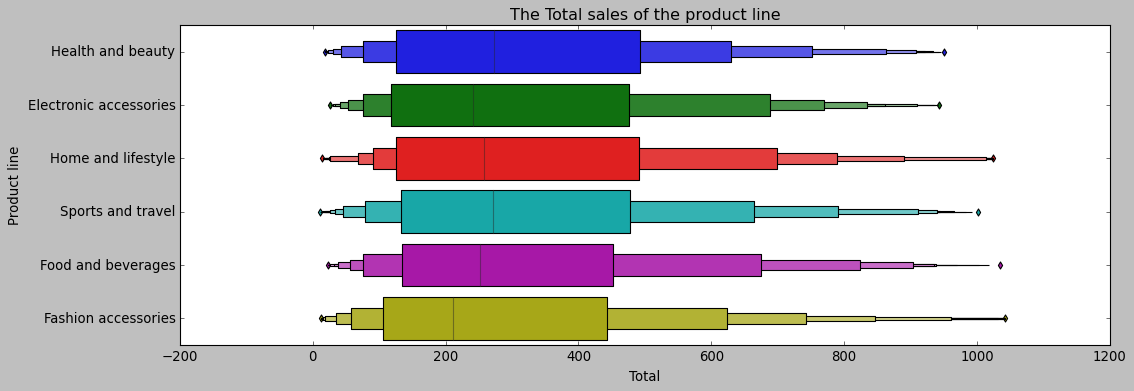

In [23]:
plt.figure(figsize=(15,5))
sns.boxenplot(x='Total',y='Product line' ,data=data)
plt.title('The Total sales of the product line')
plt.show()

##  average ratings of product

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

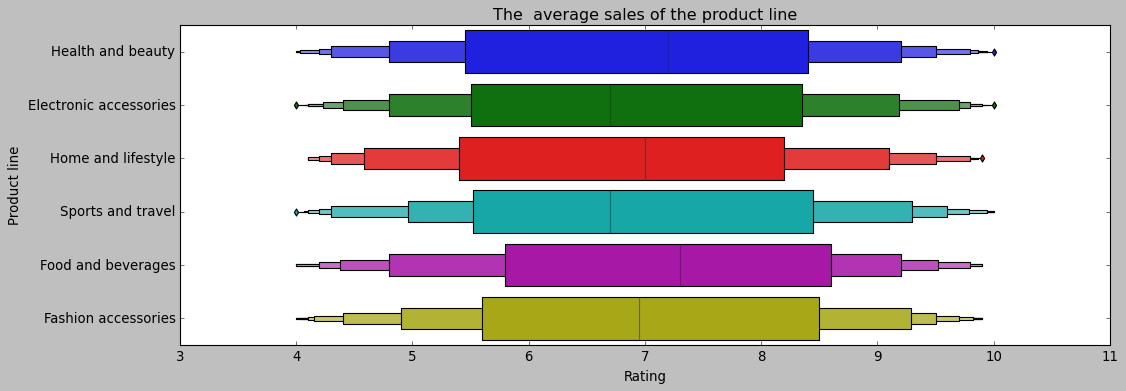

In [24]:
plt.figure(figsize=(15,5))
sns.boxenplot(x='Rating',y='Product line' ,data=data)
plt.title('The  average sales of the product line')
plt.show()

## Product sales on the basis of gender

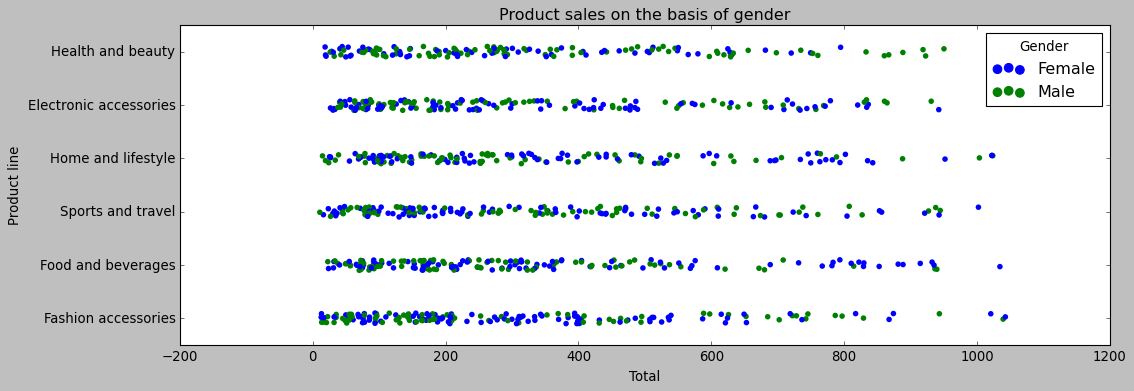

In [25]:
plt.figure(figsize=(15,5))
sns.stripplot(x='Total',y='Product line',hue='Gender',data=data)
plt.title('Product sales on the basis of gender')
plt.show()

It seem quite a good number of males bought a number of health and beauty product as compared to females

 which is something

# Product and gross income

<Figure size 1200x400 with 0 Axes>

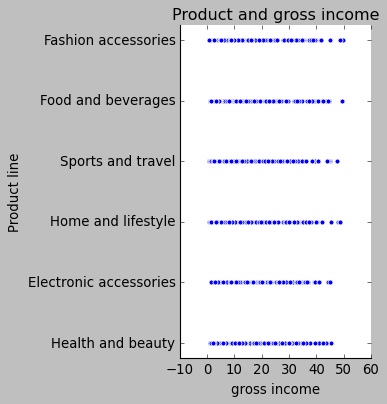

In [26]:
plt.figure(figsize=(15,5))
sns.relplot(x='gross income',y='Product line' ,data=data)
plt.title('Product and gross income')
plt.show()